<a href="https://colab.research.google.com/github/Areej973/DS_Bootcamp1/blob/main/Data_Processing_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing
Use the data from the cleaning assignment to apply the following processing techniques (If applicable):

1-Normalization\Standardization

2-Quantify

3-Summarize

4-Aggregate

5-Combine

Explain your reasoning for each technique or explain why you decided it does not apply to your dataset.

In [2]:
from google.colab import userdata
import os
os.environ["key"] = userdata.get('key')
os.environ["username"] = userdata.get('username')

In [3]:
! kaggle datasets download -d gregorut/videogamesales

Dataset URL: https://www.kaggle.com/datasets/gregorut/videogamesales
License(s): unknown
  0% 0.00/381k [00:00<?, ?B/s]
100% 381k/381k [00:00<00:00, 41.3MB/s]


In [4]:
! unzip "videogamesales.zip"

Archive:  videogamesales.zip
  inflating: vgsales.csv             


In [5]:

    # Rank - Ranking of overall sales
    # Name - The games name
    # Platform - Platform of the games release (i.e. PC,PS4, etc.)
    # Year - Year of the game's release
    # Genre - Genre of the game
    # Publisher - Publisher of the game
    # NA_Sales - Sales in North America (in millions)
    # EU_Sales - Sales in Europe (in millions)
    # JP_Sales - Sales in Japan (in millions)
    # Other_Sales - Sales in the rest of the world (in millions)
    # Global_Sales - Total worldwide sales.
#import the needed packages
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read the data
df=pd.read_csv('vgsales.csv')
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [9]:
# get the column
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [10]:
#check how many missing values
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [11]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [12]:
df['Year'].median() #2007.0
df['Year'].mean() #2006.4064433147546
df['Year'].mode() #0    2009.0


0    2009.0
Name: Year, dtype: float64

In [13]:
df["Publisher"].fillna('Unknown publisher', inplace = True) # fixed fill

In [14]:
# Choosing the most frequent year might seem like a reasonable choice,
# but it could compromise the credibility of the data and introduce bias towards a specific year.
#Delete rows that contain missing data
da=df.dropna()
da.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [15]:
da


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [16]:
#check the Platform column values
da['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [17]:
# Check for duplicate rows
da.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Length: 16327, dtype: bool

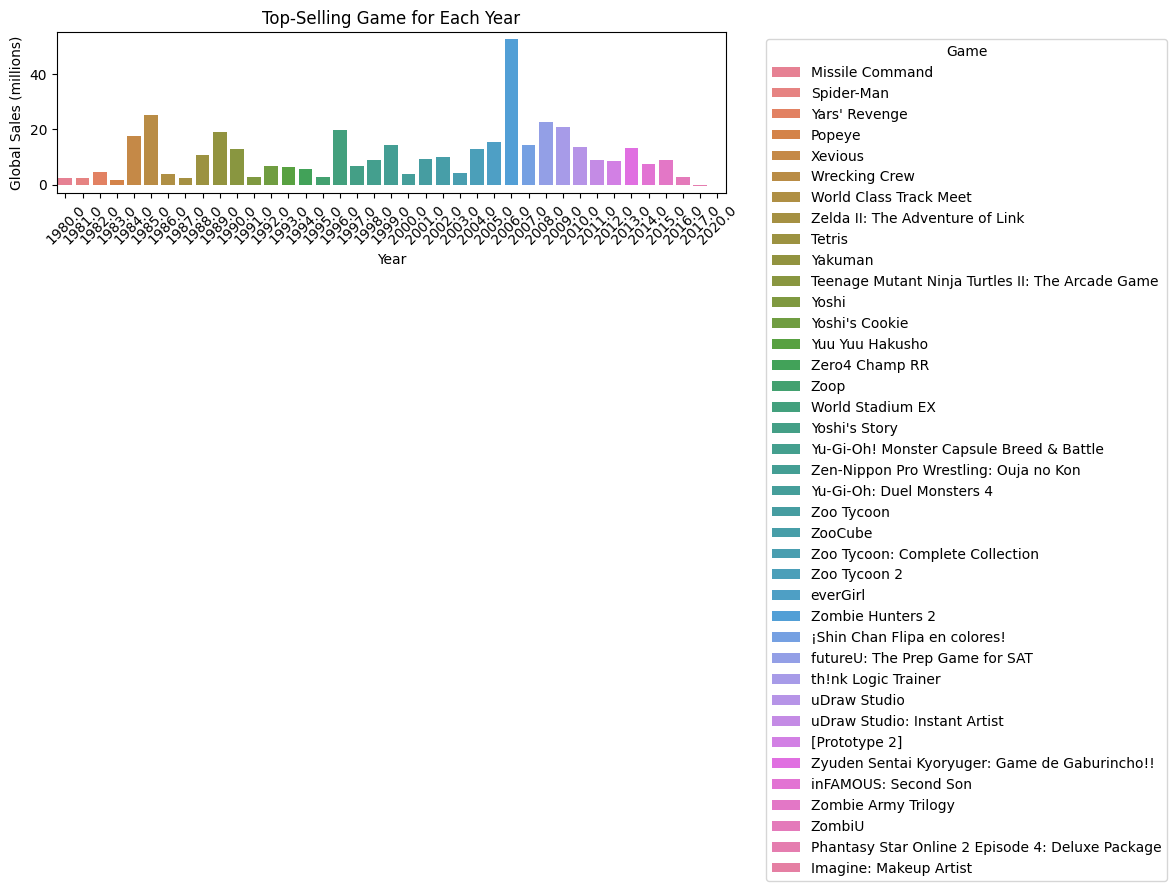

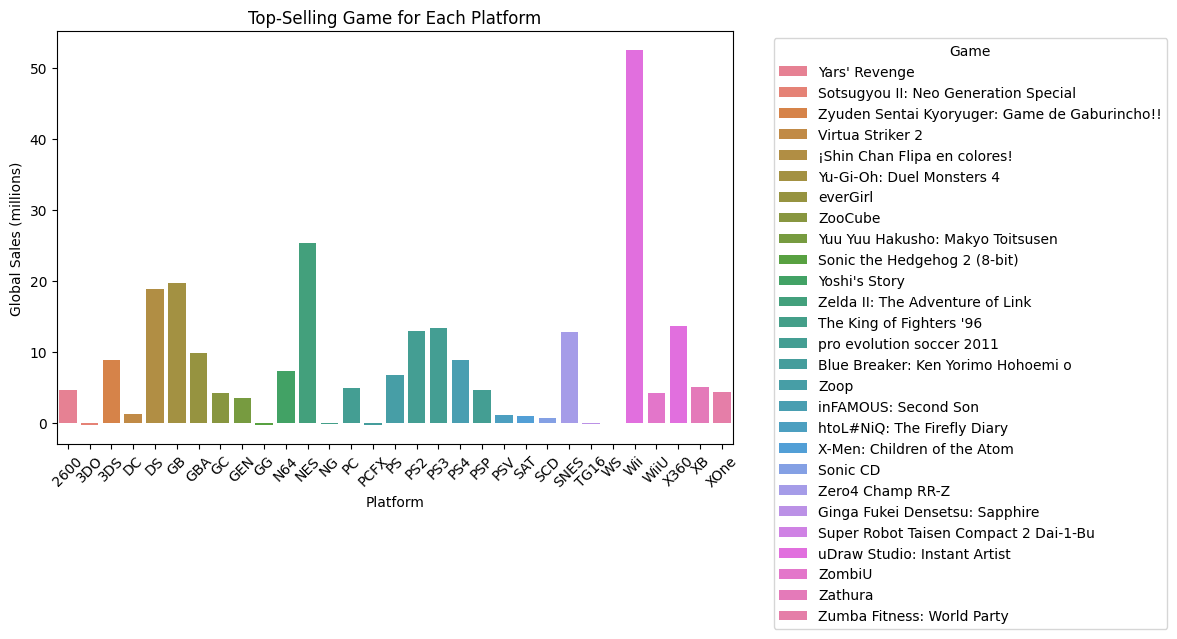

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top-selling game for each year
top_game_by_year =da.groupby('Year')[['Name', 'Global_Sales']].max()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_game_by_year.index, y=top_game_by_year['Global_Sales'], hue=top_game_by_year['Name'])
plt.title('Top-Selling Game for Each Year')
plt.xlabel('Year')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation=45)
plt.legend(title='Game', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Top-selling game for each platform
top_game_by_platform = da.groupby('Platform')[['Name', 'Global_Sales']].max()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_game_by_platform.index, y=top_game_by_platform['Global_Sales'], hue=top_game_by_platform['Name'])
plt.title('Top-Selling Game for Each Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation=45)
plt.legend(title='Game', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




**Top-selling game for each year:**

**1980s**: Notable games like "Missile Command," "Spider-Man," and "Yars' Revenge" were among the top sellers in the early 1980s.

**1990s**: Games like "Tetris," "Teenage Mutant Ninja Turtles II: The Arcade Game," and "Yoshi" stand out as top sellers.

**2000-2010**: This decade saw a substantial rise in game sales, with top-selling games including "World Stadium EX," "Yoshi's Story," and "Zoo Tycoon." Sales peaked around 2006.

**2010-2020**: The top-selling games in this decade include "Zombie Army Trilogy" and "Phantasy Star Online 2 Episode 4: Deluxe Package."

**Top-selling game for each platform:**

The five best-selling games for platforms:

Wii: "uDraw Studio: Instant Artist" - around 50 million copies.

NES: "Yuu Yuu Hakusho: Makyo Toitsusen" - more than 20 million copies.

GB: "everGirl" - more than 15 million copies.

GBA: "Yu-Gi-Oh: Duel Monsters 4" - more than 15 million copies.

PS2: "pro evolution soccer 2011" - around 10 million copies.


In [36]:
# standardization
from sklearn.preprocessing import StandardScaler
columns_to_standardize = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
scaler = StandardScaler()
da[columns_to_standardize] = scaler.fit_transform(da[columns_to_standardize])
da[columns_to_standardize].head()

#  normalization wasn't necessary because standardization already provided a suitable scale for comparison.


<ipython-input-36-56e4fae34058>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da[columns_to_standardize] = scaler.fit_transform(da[columns_to_standardize])


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,50.178075,56.751723,11.848401,44.300041,52.500870
1,35.072771,6.746820,21.606144,3.800695,25.356183
2,18.969372,25.026914,11.912596,17.177592,22.533136
3,18.847653,21.351240,10.275606,15.334319,20.732006
4,13.394650,17.184164,32.551508,5.011989,19.690927


In [20]:
# Quantify
# This step converts categorical data into numerical format.
# It wasn't required as the analysis primarily focused on numerical sales data.

#  Summarize
summary_stats = da.describe()
print(summary_stats)

               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16327.000000  16327.000000  1.632700e+04  1.632700e+04  16327.000000   
mean    8292.868194   2006.406443 -2.785247e-17 -8.355742e-17      0.000000   
std     4792.669778      5.828981  1.000031e+00  1.000031e+00      1.000031   
min        1.000000   1980.000000 -3.230599e-01 -2.900331e-01     -0.252485   
25%     4136.500000   2003.000000 -3.230599e-01 -2.900331e-01     -0.252485   
50%     8295.000000   2007.000000 -2.256849e-01 -2.507210e-01     -0.252485   
75%    12441.500000   2010.000000 -3.093478e-02 -7.381690e-02     -0.124094   
max    16600.000000   2020.000000  5.017808e+01  5.675172e+01     32.551508   

        Other_Sales  Global_Sales  
count  16327.000000  16327.000000  
mean       0.000000      0.000000  
std        1.000031      1.000031  
min       -0.254506     -0.338658  
25%       -0.254506     -0.306723  
50%       -0.201841     -0.236466  
75%       -0.043846     -0.038470  


In [21]:
# Aggregate
# combines multiple records into single summaries, such as global sales per year and name.
aggregated_data = da.groupby(['Year', 'Name']).agg({'Global_Sales': 'sum'}).reset_index()


print("\nAggregated Data by Year and Name:")
print(aggregated_data)





Aggregated Data by Year and Name:
         Year                                              Name  Global_Sales
0      1980.0                                         Asteroids      2.407746
1      1980.0                                            Boxing      0.146753
2      1980.0                                            Bridge     -0.172596
3      1980.0                                          Checkers     -0.191757
4      1980.0                                          Defender      0.325588
...       ...                                               ...           ...
12125  2016.0                    Zero Escape: Zero Time Dilemma     -0.613446
12126  2016.0                                            ZombiU     -0.313110
12127  2017.0                  Brothers Conflict: Precious Baby     -0.338658
12128  2017.0  Phantasy Star Online 2 Episode 4: Deluxe Package     -0.664542
12129  2020.0                            Imagine: Makeup Artist     -0.159822

[12130 rows x 3 columns]


In [29]:
# filter
filtered_data = aggregated_data[aggregated_data['Global_Sales'] > 0.5]
# Display the filtered data
print("\nFiltered Data (Total Global Sales > 0.5):")
print(filtered_data)



Filtered Data (Total Global Sales > 0.5):
         Year                        Name  Global_Sales
0      1980.0                   Asteroids      2.407746
8      1980.0             Missile Command      1.417763
20     1981.0                   Centipede      0.523585
26     1981.0                Demon Attack      1.015383
27     1981.0                 Donkey Kong      0.587455
...       ...                         ...           ...
11979  2016.0             Far Cry: Primal      0.957604
12032  2016.0                No Man's Sky      0.676873
12037  2016.0                   Overwatch      0.887347
12102  2016.0   Tom Clancy's The Division      2.790669
12109  2016.0  Uncharted 4: A Thief's End      2.337489

[1232 rows x 3 columns]


In [32]:
import numpy as np
import pandas as pd


# Pivot Table
pivot_table = pd.pivot_table(da, values='Global_Sales', index=['Year', 'Name'], columns='Platform', aggfunc=np.sum, fill_value=0)

# Display a subset of the pivot table (e.g., filtering by filter by specific years and platform if needed)
pivot_table_years_filtered = pivot_table.loc[2005:2006,['PS2']]
print("\nPivot Table (Filtered by Years 2005-2006 in PS2 and Selected Platforms):")
print(pivot_table_years_filtered)


# Combine (if applicable)
# No need to combine multiple datasets for this analysis




Pivot Table (Filtered by Years 2005-2006 in PS2 and Selected Platforms):
Platform                                                        PS2
Year   Name                                                        
2005.0 187: Ride or Die                                   -0.249240
       2 Games in 1 Double Pack: Hot Wheels Velocity X...  0.000000
       2 Games in 1: Disney's Brother Bear / The Lion ...  0.000000
       2 Games in 1: Sonic Advance & ChuChu Rocket!        0.000000
       2 Games in 1: Sonic Battle & ChuChu Rocket!         0.000000
...                                                             ...
2006.0 Yuu Yuu Hakusho DS: Ankoku Bujutsukai Hen           0.000000
       Zaidan Houjin Nippon Kanji Nouryoko Kentei Kyou...  0.000000
       Zaidan Houjin Nippon Kanji Nouryoku Kentei Kyou...  0.000000
       Zoids Dash                                          0.000000
       Zombie Hunters 2                                   -0.332271

[1434 rows x 1 columns]


In [37]:
da.to_csv('game_data.csv', index=False)